In [446]:
# Data Manuiplation dependencies
# https://numpy.org/
import numpy as np
# https://pandas.pydata.org/
import pandas as pd 
#----------------------------------
# Visualisations dependencies
# https://matplotlib.org/
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#https://seaborn.pydata.org/
import seaborn as sns
#-------------------------------------
import warnings
import itertools
import os
#--------------------------------
sns.set(style="darkgrid")
# Modelling dependencies
#sklearn Dependencies
# All dependencies can be found here https://scikit-learn.org/stable/
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,confusion_matrix, classification_report

# Ignore warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 90) # display all column of dataframe
pd.set_option('display.max_row', 100)
#-----------------------------------------------------------------------

# Table of Contents

    * EDA
 
    * For three Classes
        * Splitting and standardizing data for analysis

        * Logistic Model with Balanced Weights on Testing Data

        * Logistic Model with Balanced Weights on Validation Data

        * Logistic Model with no Balanced Weights on Testing Data

        * Logistic Model with no Balanced Weights on Validation Data

        * L-1 Regularization

        * Random Forest Model with Test Data

        * Random Forest Model with Validation Data
        
     * For Classes 0 and 1
        * Splitting and standardizing data for analysis

        * Logistic Model with Balanced Weights on Testing Data

        * Logistic Model with Balanced Weights on Validation Data

        * Logistic Model with no Balanced Weights on Testing Data

        * Logistic Model with no Balanced Weights on Validation Data
        
        * L-1 Regularization

        * Random Forest Model with Test Data

        * Random Forest Model with Validation Data

# EDA 

In [447]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)        


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [448]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [449]:
# import data and clean it
df = pd.read_csv('Covariate_Features.csv')
df.drop(['Coordinates','Transformed_Long','Transformed_Lat','new_long','new_lat','Raster Value'],axis=1,inplace=True)
df.set_index(['long','lat'],inplace=True)
del df['Band_28'] # Band 28 did not have any values within it
print('there are ', df.shape[0],'values in the original dataframe')
df.head()

there are  47560 values in the original dataframe


Label     Band_1    Band_2    Band_3    Band_4    Band_5  \
long     lat                                                                  
3.204167 6.911667      0  31.780069  0.739527  0.724089  2.688592  4.286776   
3.201667 6.910834      0  31.813374  0.994895  0.985522  2.950744  4.480880   
3.202500 6.910834      0  31.773357  0.926415  0.917783  2.884460  4.443317   
3.203333 6.910834      0  31.735663  0.866177  0.854744  2.819666  4.407386   
3.204167 6.910834      0  31.698177  0.811470  0.797522  2.756468  4.373125   

                      Band_6    Band_7    Band_8  Band_9  Band_10    Band_11  \
long     lat                                                                   
3.204167 6.911667  11.415614  1.205231  2.369100     0.0    0.583  18.129000   
3.201667 6.910834  11.294726  1.439247  2.656430     0.0    0.825  18.056999   
3.202500 6.910834  11.304877  1.349879  2.575939     0.0    0.743  18.049999   
3.203333 6.910834  11.315222  1.260993  2.496295     0.0    0.651  18.042999   
3.204167 6.910834  11.326365  1.172700  2.417583     0.0    0.560  18.035999   

                   Band_12   Band_13  Band_14   Band_15     Band_16  \
long     lat                                                          
3.204167 6.911667   12.066  2.265071      0.0  0.286720  103.370560   
3.201667 6.910834   12.357  1.786768      0.0  0.289738  103.442802   
3.202500 6.910834   12.268  2.265071      0.0  0.288260  103.370560   
3.203333 6.910834   12.179  2.265071      0.0  0.286658  103.370560   
3.204167 6.910834   12.089  2.265071      0.0  0.284906  103.370560   

                     Band_17  Band_18    Band_19  Band_20    Band_21  Band_22  \
long     lat                                                                    
3.204167 6.911667  20.921000    0.464  81.175003   -0.371  29.035999    0.586   
3.201667 6.910834  21.132000    0.414  80.906998   -0.293  29.257999    0.464   
3.202500 6.910834  21.089001    0.382  80.999001   -0.278  29.172001    0.464   
3.203333 6.910834  21.046000    0.371  81.091003   -0.278  29.087000    0.473   
3.204167 6.910834  21.003000    0.371  81.182999   -0.278  29.000999    0.499   

                     Band_23   Band_24  Band_25    Band_26  Band_27   Band_29  \
long     lat                                                                    
3.204167 6.911667  56.499001  0.646436   12.738  93.734001   10.195  0.263034   
3.201667 6.910834  56.410999  0.692578   13.023  93.463997   10.131  0.263034   
3.202500 6.910834  56.409000  0.636535   12.944  93.533997   10.178  0.263034   
3.203333 6.910834  56.408001  0.592647   12.864  93.603996   10.226  0.263034   
3.204167 6.910834  56.407001  0.559894   12.785  93.674004   10.274  0.263034   

                   Band_30  Band_31  Band_32    Band_33   Band_34    Band_35  \
long     lat                                                                   
3.204167 6.911667      3.0    126.0     20.0  34.562562  0.852259  14.920146   
3.201667 6.910834      3.0    126.0     80.0  34.557776  0.839812  14.818560   
3.202500 6.910834      3.0     50.0     80.0  34.558058  0.388908  14.822458   
3.203333 6.910834      3.0     50.0     80.0  34.558058  0.560225  14.828402   
3.204167 6.910834      3.0     50.0     20.0  34.558058  0.730593  14.847874   

                   Band_36   Band_37    Band_38   Band_39   Band_40   Band_41  \
long     lat                                                                    
3.204167 6.911667      4.0  0.000000   0.000000  0.869017  0.272429  0.690633   
3.201667 6.910834      1.0  0.000000   0.000000  0.868700  0.271277  0.686508   
3.202500 6.910834      1.0  0.000000   0.000000  0.868858  0.271756  0.688595   
3.203333 6.910834      4.0  4.902162  13.694674  0.868858  0.271756  0.688595   
3.204167 6.910834      6.0  0.000000   0.000000  0.869017  0.272429  0.690633   

                    Band_42   Band_43   Band_44   Band_45   Band_46   Band_47  \
long     lat                                                

In [450]:
#Count_values for sentiment
pie_data= count_values_in_column(df,"Label") # save data aS a dataframe
count_values_in_column(df,"Label")

Total  Percentage
2  32089       67.47
0  15202       31.96
1    269        0.57

<function matplotlib.pyplot.show(close=None, block=None)>

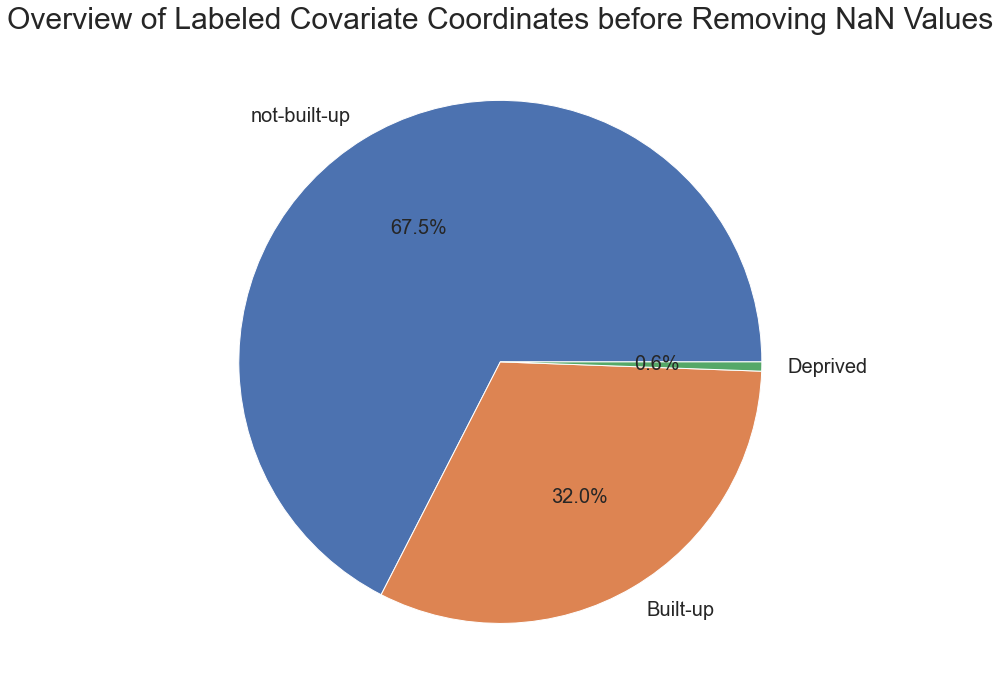

In [451]:
plt.figure(figsize=(10,10))
labels = ['not-built-up','Built-up', 'Deprived']
plt.title('Overview of Labeled Covariate Coordinates before Removing NaN Values', fontsize=30)
plt.pie(pie_data['Total'], labels=labels, autopct='%1.1f%%', textprops={'fontsize': 20})
plt.rcParams["axes.labelweight"] = "bold"
plt.tight_layout()
plt.show

In [452]:
#checking NAN on Covariate data alues
null_values = df[df.isnull().any(axis=1)]
print('there are',df[df.isnull().any(axis=1)].shape[0], 'nan values in the dataframe')
print(null_values['Label'].value_counts())
df.dropna(inplace=True)
print('there are ',df.shape[0],'rows of data after removing nan values')

there are 1987 nan values in the dataframe
2    1986
0       1
Name: Label, dtype: int64
there are  45573 rows of data after removing nan values


In [453]:
#Count_values for sentiment
pie_data= count_values_in_column(df,"Label") # save data aS a dataframe
count_values_in_column(df,"Label")

Total  Percentage
2  30103       66.05
0  15201       33.36
1    269        0.59

<function matplotlib.pyplot.show(close=None, block=None)>

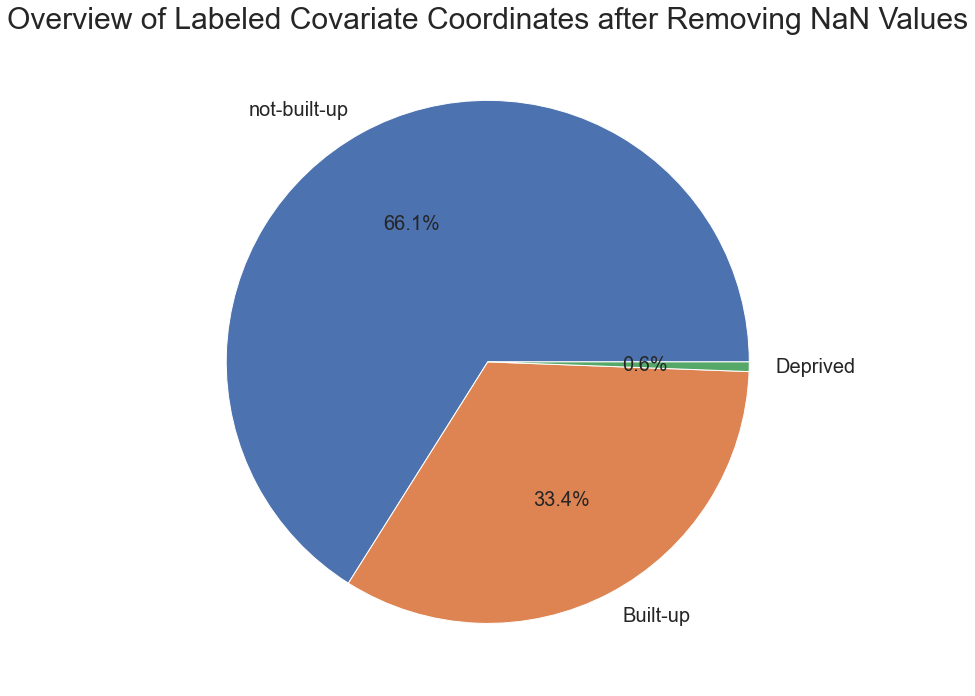

In [454]:
plt.figure(figsize=(10,10))
labels = ['not-built-up','Built-up', 'Deprived']
plt.title('Overview of Labeled Covariate Coordinates after Removing NaN Values', fontsize=30)
plt.pie(pie_data['Total'], labels=labels, autopct='%1.1f%%', textprops={'fontsize': 20})
plt.rcParams["axes.labelweight"] = "bold"
plt.tight_layout()
plt.show

In [455]:
# Some Useful Functions
def Distribution_plot(dataframe,feature, target, title, xlabel):
    """"
    Plot Distribution of feature for both classes
    
    Parameters
    ------------
    dataframe: Training dataframe
    feature: Variable to find distribution
    target: Dependent variable column containing all classes
    title: Plot title
    """
    
    # set the figure size
    plt.figure(figsize=(10,8))

    ax = plt.subplot()
    #distribution plot for all classes
    sns.distplot(dataframe[feature][dataframe[target] == 0], bins=50, label="Deprived Area")
    sns.distplot(dataframe[feature][dataframe[target] ==1], bins=50, label="Developed Area")
    sns.distplot(dataframe[feature][dataframe[target] ==2], bins=50, label="Water Area")

    plt.title(title, fontsize=14)
    plt.xlabel(xlabel)

    # Add legend and show plot
    ax.legend(title="Area classification")
    plt.show()

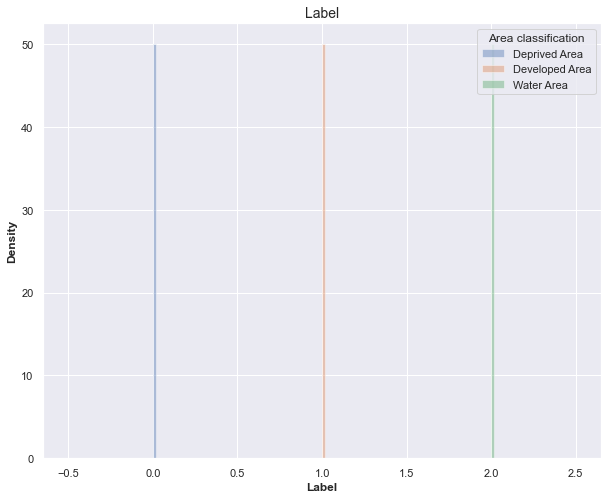

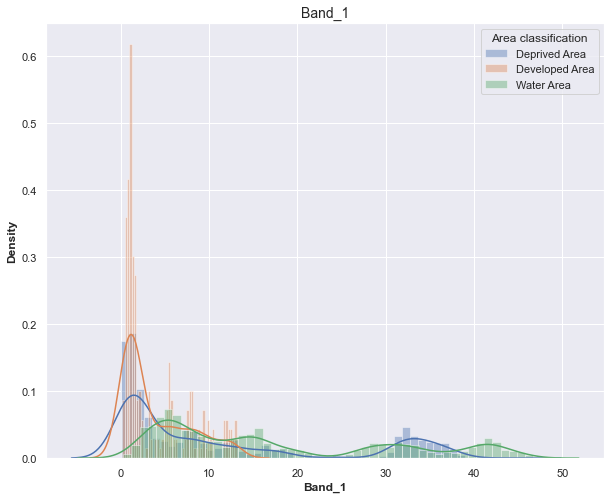

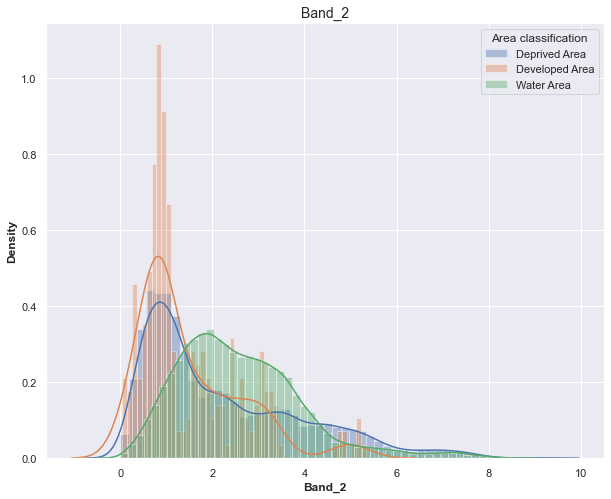

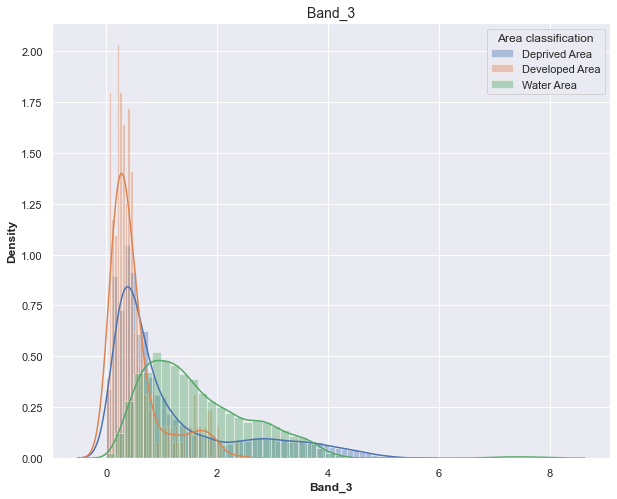

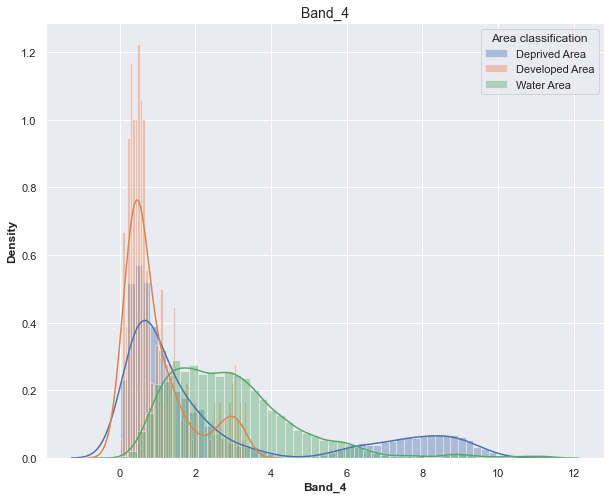

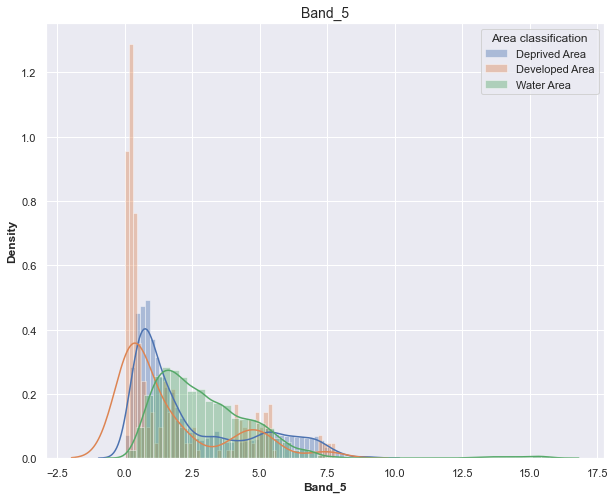

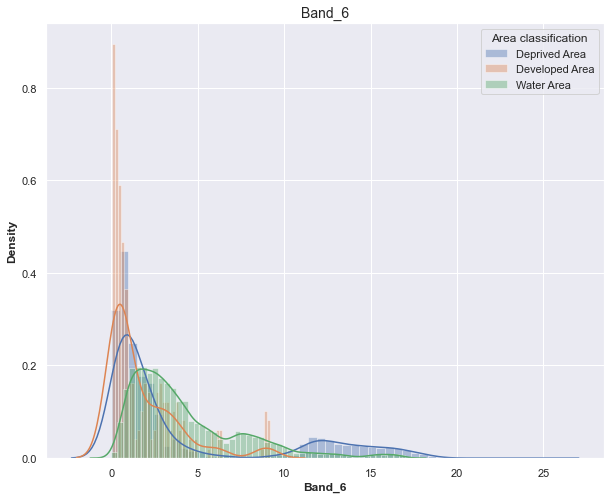

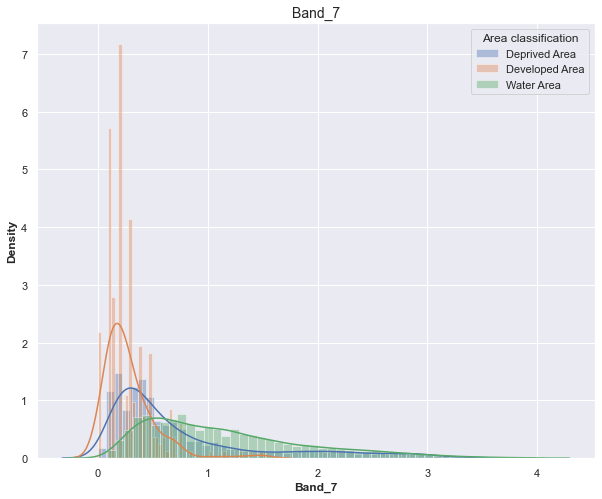

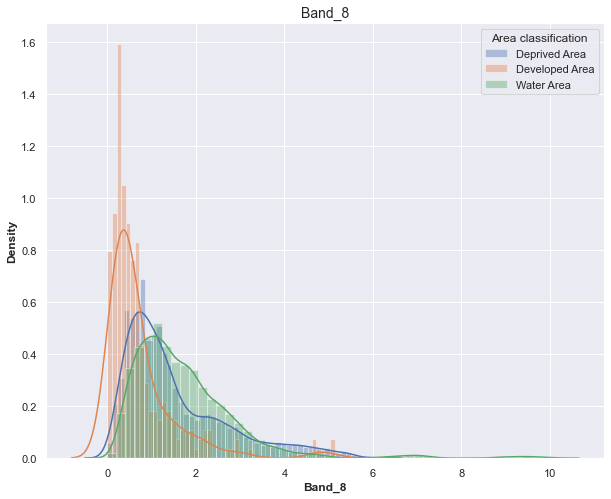

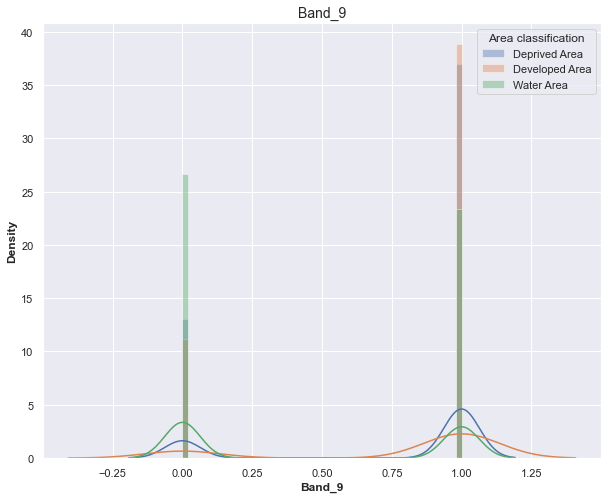

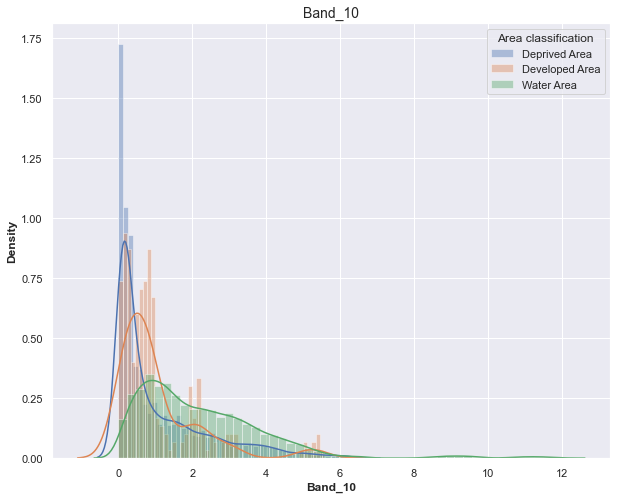

KeyboardInterrupt: 

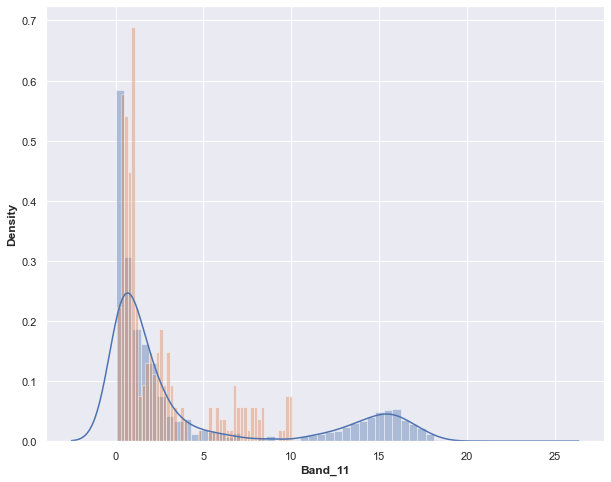

In [456]:
#created distribution plots for the variables
for i in df.columns:
    Distribution_plot(df, "{}".format(i), "Label", "{}".format(i), "{}".format(i))

In [457]:
#heat map on covariates
plt.figure(figsize=(150, 150))
plt.title('Correlation Heat Map of Covariate Data', fontsize= 250)
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='YlOrRd', square=True)
plt.tight_layout()
plt.show()

In [458]:
df.corr()



Label    Band_1    Band_2    Band_3    Band_4    Band_5    Band_6  \
Label    1.000000  0.227461  0.113430  0.211404  0.090035  0.124437  0.021028   
Band_1   0.227461  1.000000  0.314958  0.603857  0.664599  0.422833  0.775234   
Band_2   0.113430  0.314958  1.000000  0.580779  0.493962  0.359400  0.355180   
Band_3   0.211404  0.603857  0.580779  1.000000  0.709189  0.391864  0.622686   
Band_4   0.090035  0.664599  0.493962  0.709189  1.000000  0.483636  0.766277   
Band_5   0.124437  0.422833  0.359400  0.391864  0.483636  1.000000  0.589403   
Band_6   0.021028  0.775234  0.355180  0.622686  0.766277  0.589403  1.000000   
Band_7   0.238273  0.611216  0.329113  0.657345  0.576057  0.337061  0.542752   
Band_8   0.077018  0.512606  0.427106  0.694380  0.594999  0.479746  0.602145   
Band_9  -0.258808 -0.480632 -0.273614 -0.416673 -0.391229 -0.244506 -0.407027   
Band_10  0.320782  0.276859  0.383184  0.512254  0.514211  0.450046  0.417402   
Band_11  0.043532  0.442181  0.428223  0.611690  0.697862  0.640073  0.719603   
Band_12  0.076301  0.220667  0.397608  0.272614  0.325701  0.448753  0.206320   
Band_13 -0.574696 -0.428520 -0.316884 -0.395103 -0.374917 -0.304727 -0.311152   
Band_14 -0.215068 -0.369510 -0.053208 -0.362394 -0.321768 -0.285663 -0.321565   
Band_15  0.064289  0.189605  0.096795  0.107636  0.143207  0.141781  0.169482   
Band_16 -0.215056 -0.030368  0.017621  0.120942  0.114858  0.029576  0.128723   
Band_17  0.168052  0.237141  0.208310 -0.054165 -0.037579  0.180940  0.074768   
Band_18  0.504159  0.729663  0.389028  0.651191  0.664137  0.365702  0.590492   
Band_19  0.107289  0.729696  0.148187  0.602048  0.591609  0.229661  0.597175   
Band_20 -0.560532 -0.484008 -0.441899 -0.439582 -0.450941 -0.450852 -0.406255   
Band_21  0.295466  0.798182  0.265353  0.342924  0.341572  0.170968  0.448957   
Band_22  0.257449  0.145050  0.333220 -0.023793  0.016652  0.167519  0.046954   
Band_23  0.333095  0.239830  0.079510 -0.032831 -0.049301  0.296178  0.085449   
Band_24 -0.473525 -0.058193 -0.081283 -0.098430  0.060680 -0.025726  0.074843   
Band_25  0.278535  0.682965  0.195290  0.247269  0.250794  0.108684  0.278553   
Band_26  0.164407  0.770080  0.177265  0.602362  0.590578  0.301266  0.620880   
Band_27 -0.541061 -0.307417 -0.305708 -0.384573 -0.352824 -0.253562 -0.251215   
Band_29  0.151766  0.162843  0.117032  0.090474  0.088721  0.136965  0.101199   
Band_30 -0.217705 -0.346001 -0.346768 -0.377926 -0.364413 -0.309432 -0.300063   
Band_31  0.736969  0.237596  0.122271  0.219823  0.095599  0.108225  0.033540   
Band_32 -0.809559 -0.247704 -0.139487 -0.234085 -0.105165 -0.144931 -0.035379   
Band_33  0.097808  0.523833  0.053475  0.063421  0.141351  0.267819  0.362035   
Band_34  0.848721  0.245264  0.151632  0.192274  0.069044  0.128601  0.002902   
Band_35 -0.052358  0.417152  0.083879  0.453668  0.512094  0.134168  0.437566   
Band_36  0.069487  0.111091  0.058996  0.079639  0.049001  0.068834  0.053528   
Band_37 -0.397467 -0.298920 -0.294091 -0.291732 -0.294225 -0.283835 -0.248530   
Band_38 -0.384143 -0.294825 -0.292877 -0.286751 -0.290543 -0.278993 -0.244688   
Band_39  0.269946 -0.250368 -0.095151 -0.437466 -0.446081 -0.112875 -0.424414   
Band_40  0.380516  0.796349  0.221021  0.488394  0.469750  0.374001  0.556161   
Band_41 -0.214768 -0.786788 -0.444474 -0.704435 -0.726792 -0.467236 -0.734959   
Band_42 -0.100114 -0.666177 -0.316195 -0.710312 -0.684228 -0.381806 -0.664372   
Band_43 -0.067387 -0.869754 -0.264108 -0.645928 -0.724554 -0.370936 -0.807875   
Band_44  0.240630  0.676703  0.384549  0.358164  0.413881  0.440516  0.561448   
Band_45 -0.162401 -0.805701 -0.413231 -0.637426 -0.718197 -0.565378 -0.768393   
Band_46 -0.312409 -0.788535 -0.498975 -0.710790 -0.715993 -0.571838 -0.720159   
Band_47  0.106656  0.788226  0.318301  0.701387  0.792939  0.394084  0.796211   
Band_48  0.289386  0.917731  0.202201  0.565014  0.568074  0.371001  0.684024   
Band_49 -0.468845 -0.400788 -0.380202 -0.40

# Splitting and standardizing data for analysis

In [459]:
# Split data to train, val, and test
X = df.drop('Label', axis=1)
y = df['Label']
# train, val, test split 60/20/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

#create X_train_PCA dataframe for feature selection in PCA
X_train_PCA = X_train.copy()

In [460]:
# Standardize Features for training and test set
# The StandardScaler
ss = StandardScaler()
# Standardize the training data
X_train = ss.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train, columns= X.columns)
# Standardize Validation data
X_val = ss.fit_transform(X_val)
X_val_scaled = pd.DataFrame(X_val, columns= X.columns)
#Standardize Testing data
X_test = ss.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test, columns= X.columns)

In [461]:
# Check shape of split data 
print('There are', X_train_scaled.shape[0], 'rows in the train data')
print('There are', X_val_scaled.shape[0], 'rows in the validation data')
print('There are', X_test_scaled.shape[0], 'rows in the test data')

There are 27343 rows in the train data
There are 9115 rows in the validation data
There are 9115 rows in the test data


# Logistic Model with Balanced Weights on Testing Data

In [462]:
# Fitting Logistice Regression model
models = {'lr': LogisticRegression(solver= "lbfgs",class_weight = "balanced", random_state=42)}

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])
param_grids = {}

# Logistic Regression hyperparamters

# The parameter grid of tol
tol_grid = [10 ** -5, 10 ** -4, 10 ** -3, 10 ** -2, 10 ** -1]

# The parameter grid of C
C_grid = [0.001, 0.0001, 0.1, 1, 10]

#solver= ["newton-cg", "lbfgs"]

# Update param_grids
param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]

In [463]:
# Make directory to save results 
directory = os.path.dirname('result/cv_results/GridSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [464]:
# Peform Grid Search on Logistic model
best_score_params_estimator_gs = []
# GridSearchCV
gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=1,
                      cv=5,
                      return_train_score=True)
        
# Fit the pipeline
gs = gs.fit(X_train_scaled, y_train)
    

In [465]:
# Update best_score_params_estimator_gs
best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
# Get the important columns in cv_results
important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
# Move the important columns ahead
cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

# Write cv_results file
cv_results.to_csv(path_or_buf='result/cv_results/GridSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

best_score                             best_param  \
0    0.853123  {'model__C': 10, 'model__tol': 1e-05}   

                                      best_estimator  
0  (LogisticRegression(C=10, class_weight='balanc...

In [466]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]


In [467]:
# Predict using test data
y_test_pred = best_estimator_gs.predict(X_test_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision  \
0  [0.9696369636963696, 0.4, 0.9869346733668342]   

                                              Recall  \
0  [0.9566916313904266, 0.9787234042553191, 0.982...   

                                            F1-score  
0  [0.9631207998688741, 0.5679012345679012, 0.984...

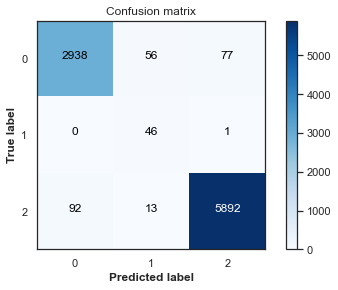

In [468]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test,y_test_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1","2"]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [469]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      3071
           1       0.40      0.98      0.57        47
           2       0.99      0.98      0.98      5997

    accuracy                           0.97      9115
   macro avg       0.79      0.97      0.84      9115
weighted avg       0.98      0.97      0.98      9115



# Logistic Model with Balanced Weights on Validation Data

In [470]:
# Predict using test data
y_val_pred = best_estimator_gs.predict(X_val_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_val, y_val_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision  \
0  [0.968503937007874, 0.4112903225806452, 0.9882...   

                                              Recall  \
0  [0.9615635179153095, 0.9807692307692307, 0.979...   

                                            F1-score  
0  [0.9650212487741092, 0.5795454545454546, 0.984...

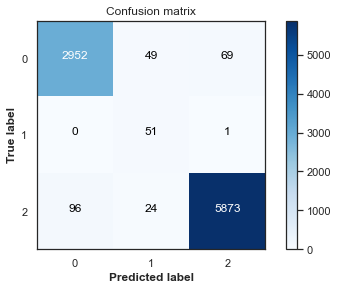

In [471]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_val,y_val_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1","2"]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [472]:
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3070
           1       0.41      0.98      0.58        52
           2       0.99      0.98      0.98      5993

    accuracy                           0.97      9115
   macro avg       0.79      0.97      0.84      9115
weighted avg       0.98      0.97      0.98      9115



# Logistic Model Building with no Balanced Classes on Testing Data

In [473]:
# manually set weights
models = {'lr': LogisticRegression(solver= "lbfgs", random_state=42)}


pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])
param_grids = {}

# Logistic Regression hyperparamters

# The parameter grid of tol
tol_grid = [10 ** -5, 10 ** -4, 10 ** -3, 10 ** -2, 10 ** -1]

# The parameter grid of C
C_grid = [0.001, 0.0001, 0.1, 1, 10]

param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]



In [474]:
# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []
# GridSearchCV
gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=-1,
                      cv=StratifiedKFold(),
                      return_train_score=True)
        
# Fit the pipeline
gs = gs.fit(X_train, y_train)
    
# Update best_score_params_estimator_gs
best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
# Get the important columns in cv_results
important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
# Move the important columns ahead
cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

# Write cv_results file
cv_results.to_csv(path_or_buf='result/cv_results/GridSearchCV/' + acronym +  'stratifiedCV.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

best_score                             best_param  \
0    0.913765  {'model__C': 10, 'model__tol': 1e-05}   

                                      best_estimator  
0  (LogisticRegression(C=10, random_state=42, tol...

In [475]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Predict using test data
y_test_pred = best_estimator_gs.predict(X_test_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision  \
0  [0.9817639257294429, 0.8333333333333334, 0.982...   

                                              Recall  \
0  [0.9641810485183979, 0.851063829787234, 0.9911...   

                                            F1-score  
0  [0.972893050763923, 0.8421052631578947, 0.9867...

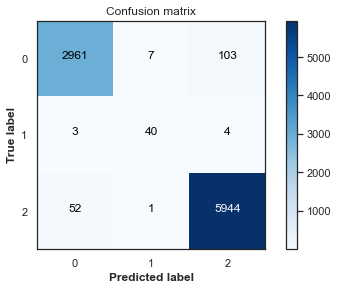

In [476]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test,y_test_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1","2"]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [477]:
 print(classification_report(y_test,y_test_pred))
    
    

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3071
           1       0.83      0.85      0.84        47
           2       0.98      0.99      0.99      5997

    accuracy                           0.98      9115
   macro avg       0.93      0.94      0.93      9115
weighted avg       0.98      0.98      0.98      9115



# Logistic Model Building with no Balanced Classes on Validation Data

In [478]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Predict using test data
y_val_pred = best_estimator_gs.predict(X_val_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_val, y_val_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision  \
0  [0.9788149619331348, 0.8409090909090909, 0.980...   

                                              Recall  \
0  [0.9631921824104235, 0.7115384615384616, 0.990...   

                                            F1-score  
0  [0.9709407322278772, 0.7708333333333333, 0.985...

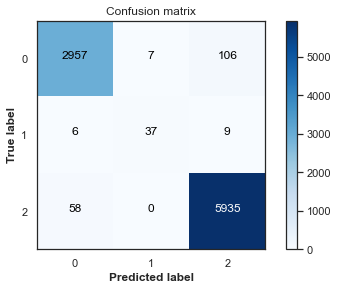

In [479]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_val,y_val_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1","2"]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [480]:
 print(classification_report(y_val,y_val_pred))
    
    

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3070
           1       0.84      0.71      0.77        52
           2       0.98      0.99      0.99      5993

    accuracy                           0.98      9115
   macro avg       0.93      0.89      0.91      9115
weighted avg       0.98      0.98      0.98      9115



# L1 Regularization

In [481]:
lm = LogisticRegression(penalty='l1',random_state=42, solver='liblinear')
# fit the model
lm.fit(X_train_scaled, y_train)
y_pred_lm= lm.predict(X_test_scaled)

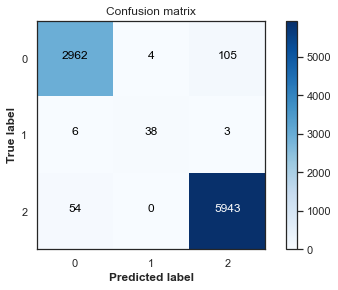

In [482]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test,y_pred_lm)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1","2"]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [483]:
 print(classification_report(y_test,y_pred_lm))
    
    

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3071
           1       0.90      0.81      0.85        47
           2       0.98      0.99      0.99      5997

    accuracy                           0.98      9115
   macro avg       0.96      0.92      0.94      9115
weighted avg       0.98      0.98      0.98      9115



In [484]:
#organize importance by coefficients
importance = lm.coef_[0]
Feat_num = []
Score = []
for i,v in enumerate(importance):
    Feat_num.append(i)
    Score.append(v)
feat_num = pd.DataFrame (Feat_num, columns = ['feature_number'])
score = pd.DataFrame (Score, columns = ['score'])


In [485]:
#get names of 
Names = []
for i in X:
    Names.append(i)
names = pd.DataFrame (Names, columns = ['Contextual_features'])
names.head()

Contextual_features
0              Band_1
1              Band_2
2              Band_3
3              Band_4
4              Band_5

In [486]:
metrics_1 = names.merge(feat_num, left_index=True, right_index=True)
metrics = metrics_1.merge(score, left_index=True, right_index=True)
metrics['values'] = metrics['score'].abs()
best_logistic= metrics.sort_values('values', ascending=False).reset_index(drop=True)
best_logistic.to_csv('Covariate_logistic_feature_importance.csv',index=False)
best_logistic.head()

Contextual_features  feature_number     score    values
0             Band_43              41 -3.620203  3.620203
1             Band_44              42  3.380467  3.380467
2             Band_51              49 -3.129951  3.129951
3             Band_33              31 -2.999807  2.999807
4             Band_18              17 -2.975743  2.975743

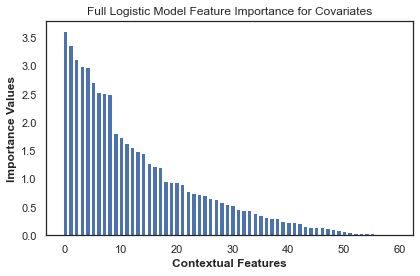

In [487]:
# plot feature importance
plt.figure()
plt.title('Full Logistic Model Feature Importance for Covariates')
plt.bar([x for x in range(len(importance))], best_logistic['values'])
plt.xlabel('Contextual Features')
plt.ylabel('Importance Values')
plt.tight_layout()
plt.show()

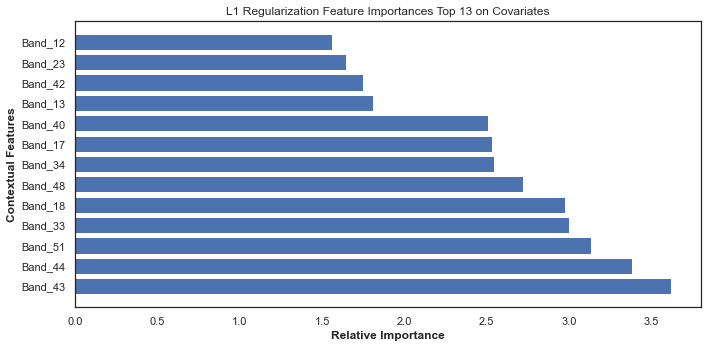

In [488]:
plt.figure(figsize=(10,5))
plt.title('L1 Regularization Feature Importances Top 13 on Covariates')
plt.barh(best_logistic['Contextual_features'][:13],best_logistic['values'][:13], color='b')
#plt.yticks(range(len(top_importances)), top_features)
plt.xlabel('Relative Importance')
plt.ylabel('Contextual Features')
plt.tight_layout()
plt.show()

# Random Forest Model with Test Data

In [489]:
models = {'rfc': RandomForestClassifier( random_state=42)}
pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])
param_grids = {}
# Random Forest Hyper Parameters
# The grids for min_samples_split
min_samples_split_grids = [2,10, 20, 50, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1,10, 20, 50, 100]

# Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

In [490]:
# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []
# GridSearchCV
gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=1,
                      cv=StratifiedKFold(),
                      return_train_score=True)
        
# Fit the pipeline
gs = gs.fit(X_train_scaled, y_train)
    
# Update best_score_params_estimator_gs
best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
# Get the important columns in cv_results
important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
# Move the important columns ahead
cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

# Write cv_results file
cv_results.to_csv(path_or_buf='result/cv_results/GridSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

best_score                                         best_param  \
0    0.953981  {'model__min_samples_leaf': 1, 'model__min_sam...   

                                      best_estimator  
0  ((DecisionTreeClassifier(max_features='auto', ...

In [491]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]


In [492]:
# Predict using test data
y_test_pred = best_estimator_gs.predict(X_test_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision  \
0  [0.9938090583251874, 1.0, 0.9961692205196535]   

                                              Recall  \
0  [0.9931618365353305, 0.8936170212765957, 0.997...   

                                            F1-score  
0  [0.993485342019544, 0.9438202247191011, 0.9967...

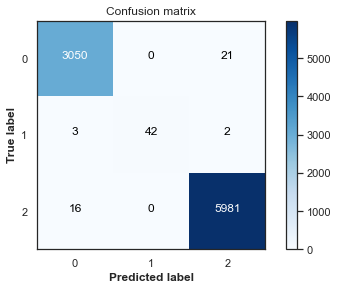

In [493]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test,y_test_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1","2"]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [494]:
print(classification_report(y_test,y_test_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3071
           1       1.00      0.89      0.94        47
           2       1.00      1.00      1.00      5997

    accuracy                           1.00      9115
   macro avg       1.00      0.96      0.98      9115
weighted avg       1.00      1.00      1.00      9115



In [495]:
target="label"
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_rfc, best_param_rfc, best_estimator_rfc = best_score_params_estimator_gs[0]

# Get the dataframe of feature and importance
df_fi_rfc = pd.DataFrame(np.hstack((np.setdiff1d(X.columns, [target]).reshape(-1, 1), best_estimator_rfc.named_steps['model'].feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

# Sort df_fi_rfc in descending order of the importance
df_fi_rfc = df_fi_rfc.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# Print the first 5 rows of df_fi_rfc
df_fi_rfc.head()

#save results as csv
df_fi_rfc.to_csv('Covariate_best_random_forest_features.csv',index=False)

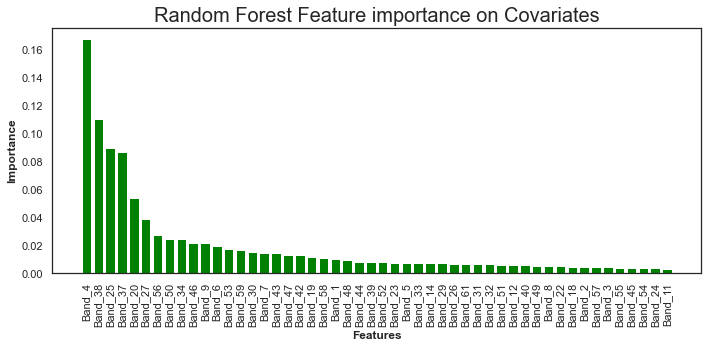

In [496]:
#Create a figure
fig = plt.figure(figsize=(10, 5))

# Implement me
# The bar plot of the top 5 feature importance
plt.bar(df_fi_rfc['Features'][:50], df_fi_rfc['Importance'][:50], color='green')

# Set x-axis
plt.title('Random Forest Feature importance on Covariates', fontsize=20)
plt.xlabel('Features')
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance')

# Save and show the figure
plt.tight_layout()
plt.show()


# Random Forest Model with Validation Data

In [497]:
# Predict using test data
y_val_pred = best_estimator_gs.predict(X_val_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_val, y_val_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision  \
0  [0.9925276153346329, 1.0, 0.9963308872581721]   

                                              Recall  \
0  [0.995114006514658, 0.7884615384615384, 0.9968...   

                                            F1-score  
0  [0.9938191281717632, 0.8817204301075269, 0.996...

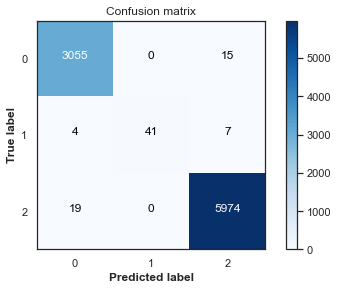

In [498]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_val,y_val_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1","2"]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [499]:
print(classification_report(y_val,y_val_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3070
           1       1.00      0.79      0.88        52
           2       1.00      1.00      1.00      5993

    accuracy                           1.00      9115
   macro avg       1.00      0.93      0.96      9115
weighted avg       1.00      1.00      0.99      9115



# PCA Feature Selection

In [500]:
from sklearn.decomposition import PCA
pca = PCA() # estimate only 2 PCs
X_new = pca.fit_transform(X_train_scaled)

In [501]:
# identify number of features needed to reach 95% threshold
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance >= .95])
n_to_reach_95 = abs(X_new.shape[1] - n_over_95 + 1)
print("Number features: {}\tTotal Variance Explained: {}".format(n_to_reach_95, total_explained_variance[n_to_reach_95-1]))

Number features: 27	Total Variance Explained: 0.9511423737601221


In [506]:
#show cumulative variance explained for first 27 components
pca.explained_variance_ratio_.cumsum()[0:27]

array([0.38, 0.51, 0.59, 0.64, 0.67, 0.71, 0.73, 0.76, 0.78, 0.79, 0.81,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.89, 0.9 , 0.9 , 0.91, 0.92, 0.92,
       0.93, 0.94, 0.94, 0.95, 0.95])

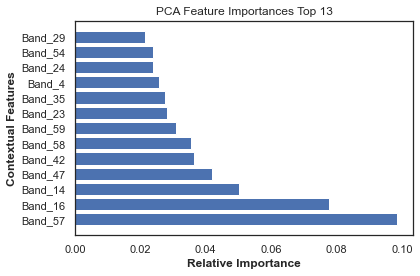

In [507]:
model = pipe.steps[1][1]
n_pcs= model.components_.shape[0]
initial_feature_names = X_train_PCA.columns
# loop through the absolute value of 144 pca components in model and select the largest value
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)] 
# create list of most important features
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# run values through random forest to extract feature importance 
zipped_feats = zip(most_important_names, pipe.steps[2][1].feature_importances_)
#sort feature importance values
zipped_feats = sorted(zipped_feats, key=lambda x: x[1], reverse=True)
features, importances = zip(*zipped_feats)
top_features = features[:13]
top_importances = importances[:13]
plt.figure()
plt.title('PCA Feature Importances Top 13')
plt.barh(range(len(top_importances)), top_importances, color='b', align='center')
plt.yticks(range(len(top_importances)), top_features)
plt.xlabel('Relative Importance')
plt.ylabel('Contextual Features')
plt.tight_layout()
plt.show()

In [508]:
#Convert top features into a dataframe
top_pca_names = pd.DataFrame(features)
top_pca_values = pd.DataFrame(importances)
top_pca = top_pca_names.merge(top_pca_values, left_index=True,right_index=True)
top_pca= top_pca.rename(columns={'0_x':'names','0_y':'values'})
top_pca.to_csv('Covariate_best_pca_features.csv',index=False)
top_pca.head()

names    values
0  Band_57  0.098549
1  Band_16  0.077854
2  Band_14  0.050195
3  Band_47  0.042041
4  Band_42  0.036377

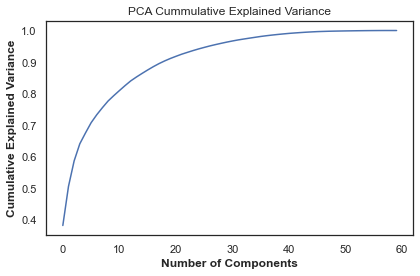

In [509]:
#plot cummulative explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA Cummulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.tight_layout()
plt.show()

# For Classes 0 and 1

# Splitting and standardizing data for analysis

In [510]:
# select 0 and 1 classes
df =df[df['Label'].isin([0,1])]
X = df.drop('Label', axis=1)
y = df['Label']
# train, val, test split 60/20/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

In [511]:
# Standardize Features for training and test set
# The StandardScaler
ss = StandardScaler()
# Standardize the training data
X_train = ss.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train, columns= X.columns)
# Standardize Validation data
X_val = ss.fit_transform(X_val)
X_val_scaled = pd.DataFrame(X_val, columns= X.columns)
#Standardize Testing data
X_test = ss.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test, columns= X.columns)

In [512]:
# Check shape of split data 
print('There are', X_train_scaled.shape[0], 'rows in the train data')
print('There are', X_val_scaled.shape[0], 'rows in the validation data')
print('There are', X_test_scaled.shape[0], 'rows in the test data')

There are 9282 rows in the train data
There are 3094 rows in the validation data
There are 3094 rows in the test data


# Logistic Model with Balanced Weights on Testing Data

In [513]:
# Fitting Logistice Regression model
models = {'lr': LogisticRegression(solver= "lbfgs",class_weight = "balanced", random_state=42)}

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])
param_grids = {}

# Logistic Regression hyperparamters

# The parameter grid of tol
tol_grid = [10 ** -5, 10 ** -4, 10 ** -3, 10 ** -2, 10 ** -1]

# The parameter grid of C
C_grid = [0.001, 0.0001, 0.1, 1, 10]

#solver= ["newton-cg", "lbfgs"]

# Update param_grids
param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]

In [514]:
# Peform Grid Search on Logistic model
best_score_params_estimator_gs = []
# GridSearchCV
gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=1,
                      cv=5,
                      return_train_score=True)
        
# Fit the pipeline
gs = gs.fit(X_train_scaled, y_train)

In [515]:
# Update best_score_params_estimator_gs
best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
# Get the important columns in cv_results
important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
# Move the important columns ahead
cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

# Write cv_results file
cv_results.to_csv(path_or_buf='result/cv_results/GridSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

best_score                             best_param  \
0    0.856082  {'model__C': 10, 'model__tol': 1e-05}   

                                      best_estimator  
0  (LogisticRegression(C=10, class_weight='balanc...

In [516]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

In [517]:
# Predict using test data
y_test_pred = best_estimator_gs.predict(X_test_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision  \
0  [0.9989993328885924, 0.6770833333333334]   

                                     Recall  \
0  [0.9897554527428949, 0.9558823529411765]   

                                   F1-score  
0  [0.9943559096945551, 0.7926829268292684]

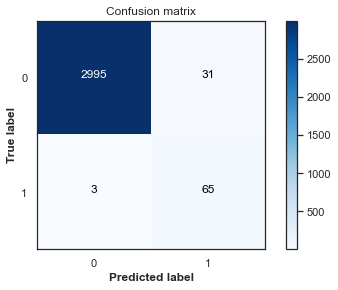

In [518]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test,y_test_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [519]:
print(classification_report(y_test,y_test_pred))



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3026
           1       0.68      0.96      0.79        68

    accuracy                           0.99      3094
   macro avg       0.84      0.97      0.89      3094
weighted avg       0.99      0.99      0.99      3094



# Logistic Model with Balanced Weights on Validation Data

In [520]:
# Predict using test data
y_val_pred = best_estimator_gs.predict(X_val_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_val, y_val_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision  \
0  [0.9996685449121644, 0.6493506493506493]   

                                     Recall  \
0  [0.9911271771278344, 0.9803921568627451]   

                                   F1-score  
0  [0.9953795379537954, 0.7812499999999999]

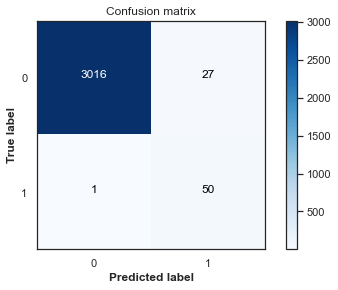

In [521]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_val,y_val_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [522]:
print(classification_report(y_val,y_val_pred))



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3043
           1       0.65      0.98      0.78        51

    accuracy                           0.99      3094
   macro avg       0.82      0.99      0.89      3094
weighted avg       0.99      0.99      0.99      3094



# Logistic Model Building with no Balanced Classes on Testing Data

In [523]:
# manually set weights
models = {'lr': LogisticRegression(solver= "lbfgs", random_state=42)}


pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])
param_grids = {}

# Logistic Regression hyperparamters

# The parameter grid of tol
tol_grid = [10 ** -5, 10 ** -4, 10 ** -3, 10 ** -2, 10 ** -1]

# The parameter grid of C
C_grid = [0.001, 0.0001, 0.1, 1, 10]

param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]


In [524]:
# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []
# GridSearchCV
gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=-1,
                      cv=StratifiedKFold(),
                      return_train_score=True)
        
# Fit the pipeline
gs = gs.fit(X_train, y_train)
    
# Update best_score_params_estimator_gs
best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
# Get the important columns in cv_results
important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
# Move the important columns ahead
cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

# Write cv_results file
cv_results.to_csv(path_or_buf='result/cv_results/GridSearchCV/' + acronym +  'stratifiedCV.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

best_score                             best_param  \
0    0.929718  {'model__C': 10, 'model__tol': 1e-05}   

                                      best_estimator  
0  (LogisticRegression(C=10, random_state=42, tol...

In [525]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Predict using test data
y_test_pred = best_estimator_gs.predict(X_test_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision  \
0  [0.9967029343883943, 0.9508196721311475]   

                                     Recall  \
0  [0.9990085922009253, 0.8529411764705882]   

                                   F1-score  
0  [0.9978544314243274, 0.8992248062015503]

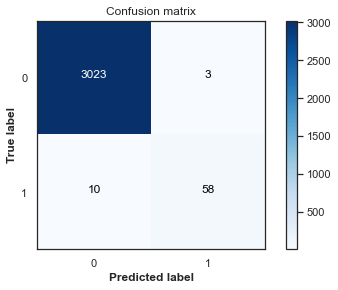

In [526]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test,y_test_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [527]:
 print(classification_report(y_test,y_test_pred))
    
    

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3026
           1       0.95      0.85      0.90        68

    accuracy                           1.00      3094
   macro avg       0.97      0.93      0.95      3094
weighted avg       1.00      1.00      1.00      3094



# Logistic Model Building with no Balanced Classes on Validation Data

In [528]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Predict using test data
y_val_pred = best_estimator_gs.predict(X_val_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_val, y_val_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision  \
0  [0.9973736047275115, 0.8958333333333334]   

                                     Recall  \
0  [0.9983568846533026, 0.8431372549019608]   

                                   F1-score  
0  [0.9978650024634587, 0.8686868686868686]

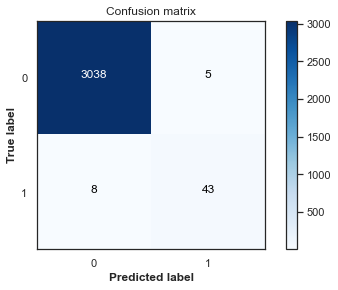

In [529]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_val,y_val_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [530]:
 print(classification_report(y_val,y_val_pred))
    

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3043
           1       0.90      0.84      0.87        51

    accuracy                           1.00      3094
   macro avg       0.95      0.92      0.93      3094
weighted avg       1.00      1.00      1.00      3094



# L1 Regularization

In [531]:
lm = LogisticRegression(penalty='l1',random_state=42, solver='liblinear')
# fit the model
lm.fit(X_train_scaled, y_train)
y_pred_lm= lm.predict(X_test_scaled)

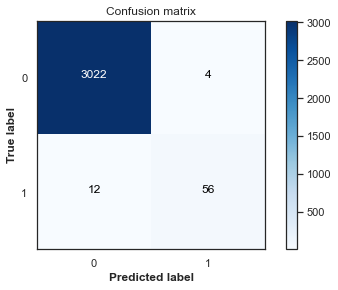

In [532]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test,y_pred_lm)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [533]:
 print(classification_report(y_test,y_pred_lm))
    
    

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3026
           1       0.93      0.82      0.87        68

    accuracy                           0.99      3094
   macro avg       0.96      0.91      0.94      3094
weighted avg       0.99      0.99      0.99      3094



In [534]:
#organize importance by coefficients
importance = lm.coef_[0]
Feat_num = []
Score = []
for i,v in enumerate(importance):
    Feat_num.append(i)
    Score.append(v)
feat_num = pd.DataFrame (Feat_num, columns = ['feature_number'])
score = pd.DataFrame (Score, columns = ['score'])


In [535]:
#get names of 
Names = []
for i in X:
    Names.append(i)
names = pd.DataFrame (Names, columns = ['Contextual_features'])
names.head()

Contextual_features
0              Band_1
1              Band_2
2              Band_3
3              Band_4
4              Band_5

In [536]:
metrics_1 = names.merge(feat_num, left_index=True, right_index=True)
metrics = metrics_1.merge(score, left_index=True, right_index=True)
metrics['values'] = metrics['score'].abs()
best_logistic_0_1= metrics.sort_values('values', ascending=False).reset_index(drop=True)
best_logistic_0_1.to_csv('Covariate_logistic_feature_importance_0_1.csv',index=False)
best_logistic_0_1.head()

Contextual_features  feature_number     score    values
0             Band_43              41  7.023409  7.023409
1             Band_47              45  5.973129  5.973129
2             Band_44              42 -3.354949  3.354949
3             Band_13              12 -3.031059  3.031059
4             Band_11              10  2.884684  2.884684

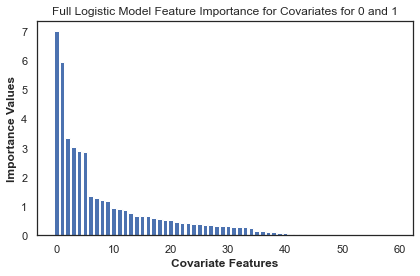

In [537]:
# plot feature importance
plt.figure()
plt.title('Full Logistic Model Feature Importance for Covariates for 0 and 1')
plt.bar([x for x in range(len(importance))], best_logistic_0_1['values'])
plt.xlabel('Covariate Features')
plt.ylabel('Importance Values')
plt.tight_layout()
plt.show()

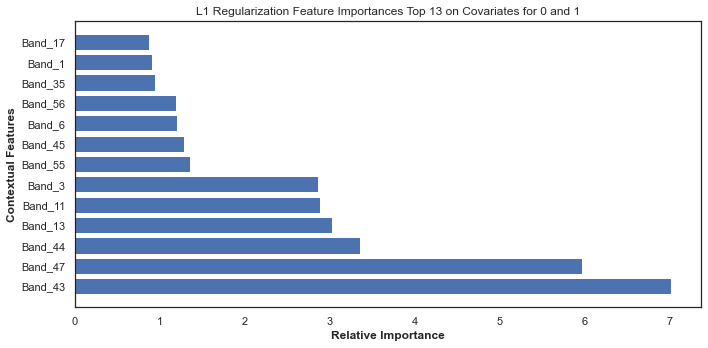

In [538]:
plt.figure(figsize=(10,5))
plt.title('L1 Regularization Feature Importances Top 13 on Covariates for 0 and 1')
plt.barh(best_logistic_0_1['Contextual_features'][:13],best_logistic_0_1['values'][:13], color='b')
#plt.yticks(range(len(top_importances)), top_features)
plt.xlabel('Relative Importance')
plt.ylabel('Contextual Features')
plt.tight_layout()
plt.show()

# Random Forest Model with Test Data

In [539]:
models = {'rfc': RandomForestClassifier( random_state=42)}
pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])
param_grids = {}
# Random Forest Hyper Parameters
# The grids for min_samples_split
min_samples_split_grids = [2,10, 20, 50, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1,10, 20, 50, 100]

# Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

In [540]:
# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []
# GridSearchCV
gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=1,
                      cv=StratifiedKFold(),
                      return_train_score=True)
        
# Fit the pipeline
gs = gs.fit(X_train_scaled, y_train)
    
# Update best_score_params_estimator_gs
best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
# Get the important columns in cv_results
important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
# Move the important columns ahead
cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

# Write cv_results file
cv_results.to_csv(path_or_buf='result/cv_results/GridSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

best_score                                         best_param  \
0    0.951369  {'model__min_samples_leaf': 1, 'model__min_sam...   

                                      best_estimator  
0  ((DecisionTreeClassifier(max_features='auto', ...

In [541]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]


In [542]:
# Predict using test data
y_test_pred = best_estimator_gs.predict(X_test_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision                     Recall  \
0  [0.9963780046098123, 1.0]  [1.0, 0.8382352941176471]   

                                   F1-score  
0  [0.9981857166419265, 0.9119999999999999]

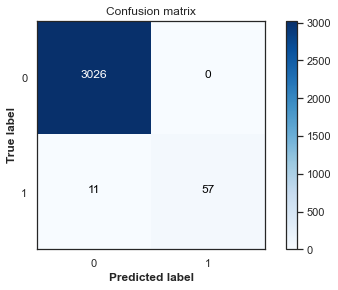

In [543]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test,y_test_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [544]:
print(classification_report(y_test,y_test_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3026
           1       1.00      0.84      0.91        68

    accuracy                           1.00      3094
   macro avg       1.00      0.92      0.96      3094
weighted avg       1.00      1.00      1.00      3094



In [545]:
target="label"
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_rfc, best_param_rfc, best_estimator_rfc = best_score_params_estimator_gs[0]

# Get the dataframe of feature and importance
df_fi_rfc_0_1 = pd.DataFrame(np.hstack((np.setdiff1d(X.columns, [target]).reshape(-1, 1), best_estimator_rfc.named_steps['model'].feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

# Sort df_fi_rfc in descending order of the importance
df_fi_rfc_0_1 = df_fi_rfc_0_1.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# Print the first 5 rows of df_fi_rfc
df_fi_rfc_0_1.head()

#save results as csv
df_fi_rfc_0_1.to_csv('Covariate_best_random_forest_features_0_1.csv',index=False)

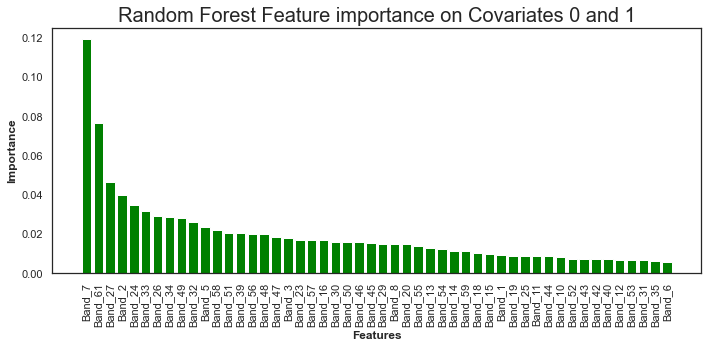

In [546]:
#Create a figure
fig = plt.figure(figsize=(10, 5))

# Implement me
# The bar plot of the top 5 feature importance
plt.bar(df_fi_rfc_0_1['Features'][:50], df_fi_rfc_0_1['Importance'][:50], color='green')

# Set x-axis
plt.title('Random Forest Feature importance on Covariates 0 and 1', fontsize=20)
plt.xlabel('Features')
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance')

# Save and show the figure
plt.tight_layout()
plt.show()

# Random Forest Model with Validation Data

In [547]:
# Predict using test data
y_val_pred = best_estimator_gs.predict(X_val_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_val, y_val_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision  \
0  [0.9977034120734908, 0.9565217391304348]   

                                     Recall  \
0  [0.9993427538613211, 0.8627450980392157]   

                                   F1-score  
0  [0.9985224101132819, 0.9072164948453608]

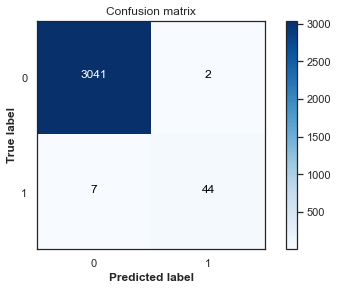

In [548]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_val,y_val_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [549]:
print(classification_report(y_val,y_val_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3043
           1       0.96      0.86      0.91        51

    accuracy                           1.00      3094
   macro avg       0.98      0.93      0.95      3094
weighted avg       1.00      1.00      1.00      3094



# PCA Feature Selection- class 0 and 1

In [574]:
from sklearn.decomposition import PCA
pca = PCA() # estimate only 2 PCs
X_new = pca.fit_transform(X_train_scaled)

In [575]:
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance >= .95])
n_to_reach_95 = abs(X_new.shape[1] - n_over_95 + 1)
print("Number features: {}\tTotal Variance Explained: {}".format(n_to_reach_95, total_explained_variance[n_to_reach_95-1]))

Number features: 23	Total Variance Explained: 0.9533728810174212


In [576]:
#create pipe line for selecting features
pipe = Pipeline([('scaler', StandardScaler()),
 ('pca', PCA(n_components=60,random_state=42)),
 ('clf', RandomForestClassifier())])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=60, random_state=42)),
                ('clf', RandomForestClassifier())])

In [577]:
#show cumulative variance explained for first 23 components
pca.explained_variance_ratio_.cumsum()[0:23]

array([0.46, 0.57, 0.64, 0.68, 0.72, 0.74, 0.77, 0.79, 0.81, 0.83, 0.84,
       0.86, 0.87, 0.88, 0.9 , 0.91, 0.92, 0.92, 0.93, 0.94, 0.94, 0.95,
       0.95])

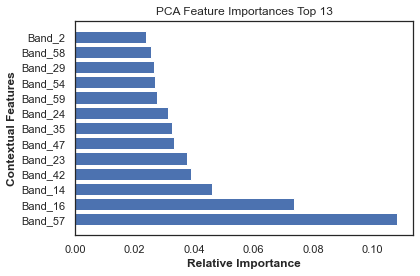

In [578]:
model = pipe.steps[1][1]
n_pcs= model.components_.shape[0]
initial_feature_names = X_train_PCA.columns
# loop through the absolute value of 60 pca components in model and select the largest value
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)] 
# create list of most important features
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# run values through random forest to extract feature importance 
zipped_feats = zip(most_important_names, pipe.steps[2][1].feature_importances_)
#sort feature importance values
zipped_feats = sorted(zipped_feats, key=lambda x: x[1], reverse=True)
features, importances = zip(*zipped_feats)
top_features = features[:13]
top_importances = importances[:13]
plt.figure()
plt.title('PCA Feature Importances Top 13')
plt.barh(range(len(top_importances)), top_importances, color='b', align='center')
plt.yticks(range(len(top_importances)), top_features)
plt.xlabel('Relative Importance')
plt.ylabel('Contextual Features')
plt.tight_layout()
plt.show()

In [569]:
#Convert top features into a dataframe
top_pca_names = pd.DataFrame(features)
top_pca_values = pd.DataFrame(importances)
top_pca = top_pca_names.merge(top_pca_values, left_index=True,right_index=True)
top_pca= top_pca.rename(columns={'0_x':'names','0_y':'values'})
top_pca.to_csv('Covariate_best_pca_features_0_1.csv',index=False)
top_pca.head()

names    values
0  Band_57  0.121603
1  Band_16  0.068312
2  Band_14  0.038800
3  Band_42  0.037700
4  Band_47  0.036556

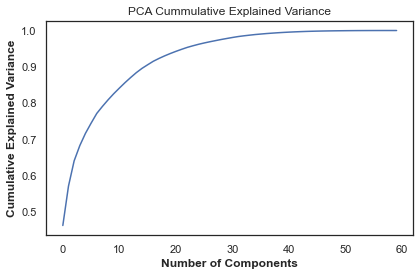

In [579]:
#plot cummulative explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA Cummulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.tight_layout()
plt.show()

# Comparing Feature Selections of Different Models

In [570]:
# add rank to Logistic feature importance three classes
best_logistic['top_logistic_0_2']= range(1,len(best_logistic)+1)


# add rank to Random Forest feature importance three classes
df_fi_rfc = df_fi_rfc.rename(columns = {'Features':'Contextual_features','Importance':'values'})
df_fi_rfc['top_Random_Forest_0_2']= range(1,len(df_fi_rfc)+1)


# add rank to Logistic feature importance two classes
best_logistic_0_1['top_logistic_0_1']= range(1,len(best_logistic_0_1)+1)


# Random Forest feature importance two classes
df_fi_rfc_0_1 = df_fi_rfc_0_1.rename(columns = {'Features':'Contextual_features','Importance':'values'})
df_fi_rfc_0_1['top_Random_Forest_0_1']= range(1,len(df_fi_rfc_0_1)+1)


df_fi_rfc_0_1.head()

Contextual_features    values  top_Random_Forest_0_1
0              Band_7  0.119095                      1
1             Band_61  0.076437                      2
2             Band_27  0.046593                      3
3              Band_2  0.039785                      4
4             Band_24  0.034857                      5

In [571]:
#merge best featurees 

best_2 = best_logistic.merge(df_fi_rfc[['Contextual_features','top_Random_Forest_0_2']], on = 'Contextual_features')
best_1 = best_2.merge(best_logistic_0_1[['Contextual_features','top_logistic_0_1']], on = 'Contextual_features')
best = best_1.merge(df_fi_rfc_0_1[['Contextual_features','top_Random_Forest_0_1']], on = 'Contextual_features')

#create rank column
best['overall_rank'] = best['top_logistic_0_2'] + best['top_Random_Forest_0_2'] + best['top_logistic_0_1'] + best['top_Random_Forest_0_1'] 

best.sort_values(by= ['overall_rank']).reset_index(drop=True)
best['rank']= range(1,len(df_fi_rfc_0_1)+1)
#del best['rank']
best.head()

Contextual_features  feature_number     score    values  top_logistic_0_2  \
0             Band_43              41 -3.620203  3.620203                 1   
1             Band_44              42  3.380467  3.380467                 2   
2             Band_51              49 -3.129951  3.129951                 3   
3             Band_33              31 -2.999807  2.999807                 4   
4             Band_18              17 -2.975743  2.975743                 5   

   top_Random_Forest_0_2  top_logistic_0_1  top_Random_Forest_0_1  \
0                     17                 1                     43   
1                     24                 3                     40   
2                     36                48                     13   
3                     29                55                      6   
4                     42                24                     34   

   overall_rank  rank  
0            62     1  
1            69     2  
2           100     3  
3            94     4  
4           105     5

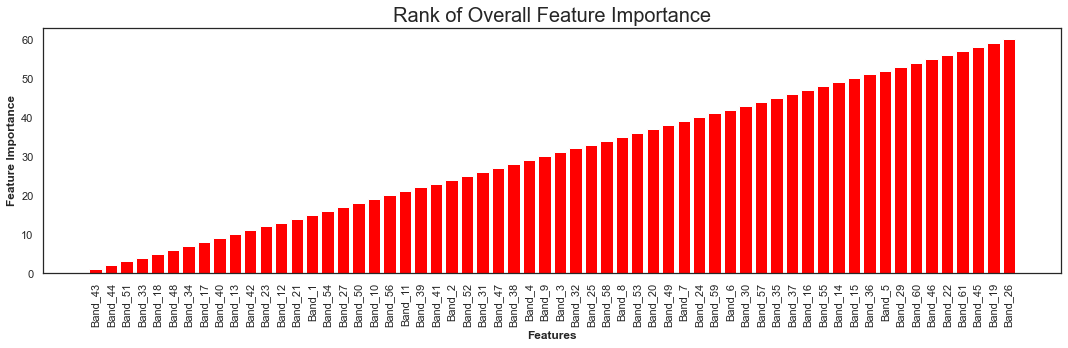

In [572]:
fig = plt.figure(figsize=(15, 5))
plt.bar(best['Contextual_features'], best['rank'], color='red')

# Set x-axis
plt.title('Rank of Overall Feature Importance', fontsize=20)
plt.xlabel('Features')
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Feature Importance')

# Save and show the figure
plt.tight_layout()
plt.show()

In [573]:
best['Contextual_features'].tolist()[:10]

['Band_43',
 'Band_44',
 'Band_51',
 'Band_33',
 'Band_18',
 'Band_48',
 'Band_34',
 'Band_17',
 'Band_40',
 'Band_13']